In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import timedelta
from pmdarima import auto_arima

In [3]:
df = pd.read_csv("dataset.csv", index_col="ts", parse_dates = True)
df.head()

,id,light,temperature,soil_moisture,humidity,api_temp,precipitation,cloud_cover
ts,,,,,,,,
2025-04-01 21:15:00,1,34.3262,33.3125,3262.0,84,27.9,0.1,100
2025-04-01 21:30:00,2,33.9057,33.4688,3232.5,84,27.8,0.1,100
2025-04-01 21:45:00,3,33.2979,33.5938,3218.0,85,27.8,0.1,100
2025-04-01 22:00:00,4,33.6201,33.3281,3211.0,85,27.6,0.0,100
2025-04-01 22:15:00,5,33.2979,33.3438,3203.0,85,27.6,0.0,100


# EDA

In [18]:
df["soil_moisture"].diff().dropna()

ts
2025-04-01 21:30:00   -29.5
2025-04-01 21:45:00   -14.5
2025-04-01 22:00:00    -7.0
2025-04-01 22:15:00    -8.0
2025-04-01 22:30:00     1.0
                       ... 
2025-04-14 10:15:00     2.5
2025-04-14 10:30:00    13.5
2025-04-14 10:45:00    -8.5
2025-04-14 11:00:00    -1.0
2025-04-14 11:15:00    -1.0
Name: soil_moisture, Length: 1129, dtype: float64

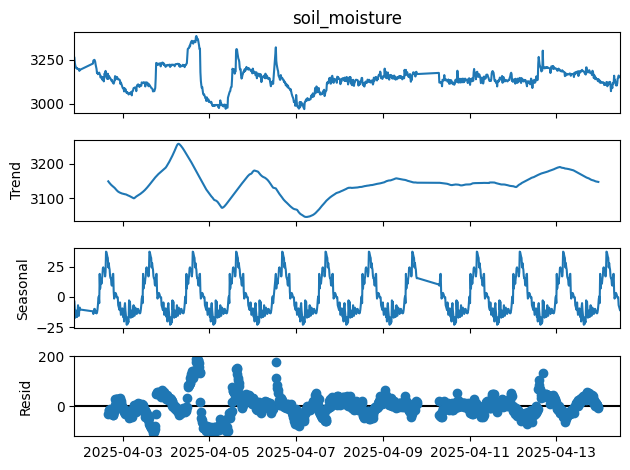

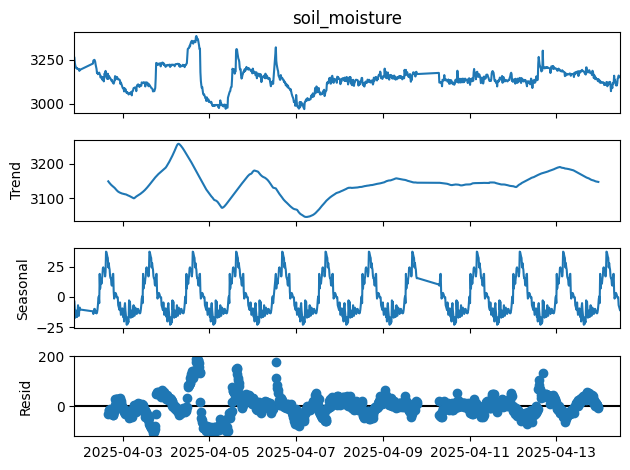

In [16]:
seasonal_decompose(df["soil_moisture"], model="additive", period=96).plot()


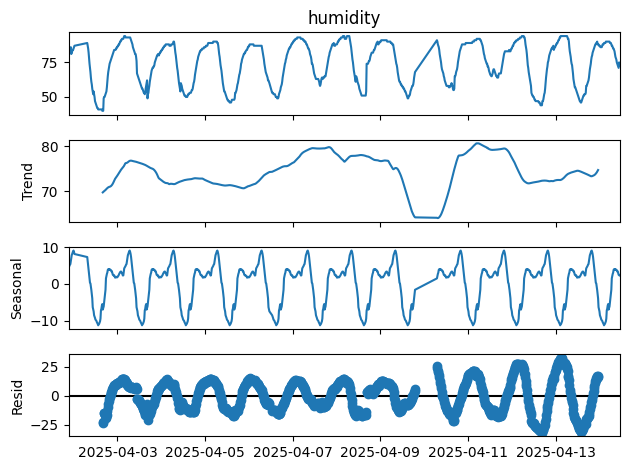

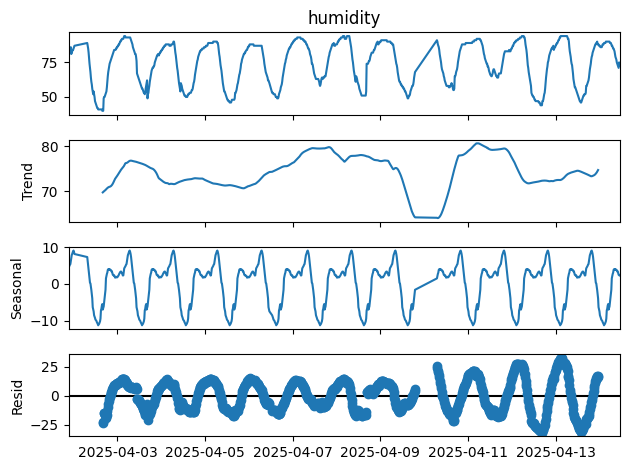

In [13]:
seasonal_decompose(df["humidity"], model="additive", period=96).plot()

## Find D parameter

In [22]:
result = adfuller(df["soil_moisture"].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -3.84682253492801
p-value: 0.002462993575594422
Critial Values:
   1%, -3.4361604996756685
Critial Values:
   5%, -2.864105678204421
Critial Values:
   10%, -2.568136037454102


Since p-value is less than 0.05, the data is stationary and no differencing is needed.

Therefore, we use d=0.

## Find P parameter

<BarContainer object of 25 artists>

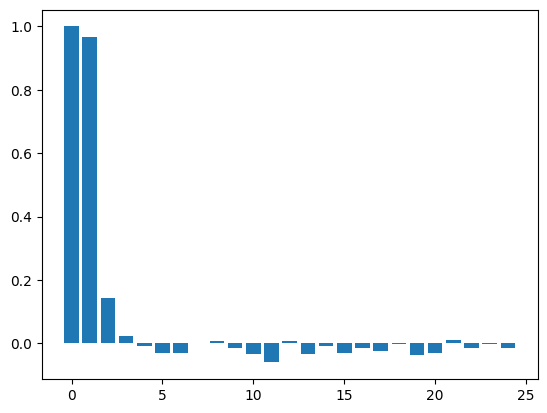

In [11]:
# I believe 2 or 3 is the variable for the term AR in order
pacf_vals = pacf(df["soil_moisture"])
# where did 25 came from?
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

## Find Q parameter

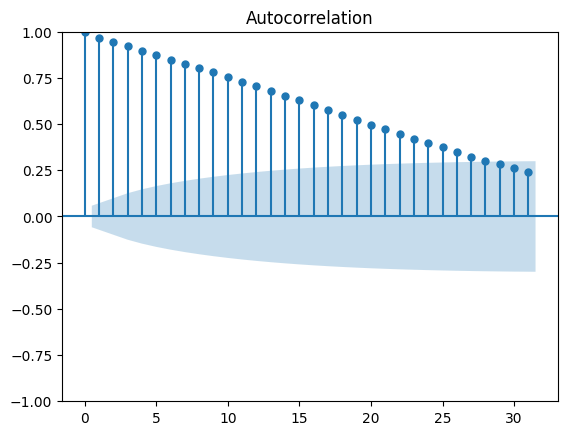

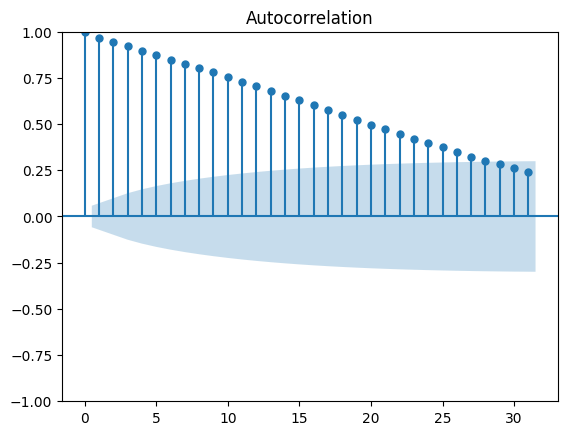

In [23]:
plot_acf(df["soil_moisture"])

## Auto Arima (fuck it we balls)

In [6]:
auto_arima(df[["soil_moisture"]], start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9590.497, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9613.159, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9589.335, Time=0.14 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9588.501, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9611.197, Time=0.04 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9590.497, Time=0.29 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9592.234, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9586.551, Time=0.05 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9588.547, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9588.546, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9587.383, Time=0.07 sec


/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jang/ske/da/project-sarimax/env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9590.280, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.410 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

wtf?

# Data Preprocessing

In [9]:
train_end = datetime(2025,4,2)
test_end = datetime(2025,4,11)

train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

In [ ]:
SARIMAX()